# 1.Tổng quan bài toán

Trong dự án này, chúng ta sẽ dự đoán liệu ngày mai trời có mưa hay không bằng cách đào tạo mô hình phân loại nhị phân. Dự đoán thời tiết là một trong những ứng dụng chính của các mô hình máy học do việc phân tích và giải các phương trình toán học cụ thể rất phức tạp và hầu như không thể dự đoán được với các điều kiện cho trước. Do đó đòi hỏi phải có các mô hình máy học để có thể đưa ra được dự đoán tốt nhất có thể dựa trên các dữ liệu hiện có.

Bộ dữ liệu bao gồm nhiệt độ tối thiểu và tối đa hàng ngày, lượng mưa, cấp gió giật mạnh nhất, chỉ số hơi và nắng, cùng với các giá trị nhiệt độ, độ ẩm, gió, mây và áp suất tại thời điểm 9 giờ sáng và 3 giờ chiều. Thông tin rõ hơn về bộ dữ liệu này học viên có thể xem tại [đây](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml)

## 1.1 Load các package cần thiết

- Bước đầu tiên trong việc xây dựng mô hình là load các thư viện cần thiết.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## 1.2 Load tập dữ liệu

- Bước tiếp theo là load tập dữ liệu.

In [2]:
df = pd.read_csv('weatherAUS.csv')

# 2.Khai phá dữ liệu

- Bây giờ, đã đến lúc khám phá dữ liệu để hiểu rõ hơn về nó.

## 2.1 Tổng quan dữ liệu

In [3]:
df.shape

(142193, 24)

- Chúng ta có thể thấy rằng có 142193 mẫu dữ liệu và 24 đặc trưng trong tập dữ liệu.

- In ra một vài mẫu dữ liệu

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


- In ra tên của các đặc trưng

In [5]:
## Requirement 1:
## PUT YOUR CODE HERE:

col_names = df.keys()

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

<details><summary> Hint </summary>

Use ```columns``` attribute

</details>

- Trong mô tả của tập dữ liệu này trên [**Kaggle**](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package/version/2) thì chúng ta nên loại bỏ đặc trưng **RISK_MM** vì nó sẽ làm ảnh hưởng đến độ chính xác của mô hình chúng ta xây dựng

In [6]:
## Requirement 2:
## PUT YOUR CODE HERE:
df.drop(['RISK_MM'], axis=1, inplace=True)
"""
labels:tham số xác định hàng hoặc cột cần xóa
axit = 1: xóa cột, vì RISK_MM là features
inplace = True, xóa đi và sẽ thay đổi DF gốc. Vì RISK_MM ảnh hưởng độ chính xác nên cần thay đổi DF
"""

'\nlabels:tham số xác định hàng hoặc cột cần xóa\naxit = 1: xóa cột, vì RISK_MM là features\ninplace = True, xóa đi và sẽ thay đổi DF gốc. Vì RISK_MM ảnh hưởng độ chính xác nên cần thay đổi DF\n'

<details><summary> Hint </summary>

[drop()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)

</details>

- Xem tóm tắt một số đặc điểm về tập dữ liệu

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

**Bình luận**

- Chúng ta có thể thấy rằng tập dữ liệu chứa hỗn hợp các biến hạng mục và biến giá trị số.

- Biến hạng mục có kiểu dữ liệu 'object'.

- Biến giá trị số có kiểu dữ liệu 'float64'.

- Ngoài ra, có một số giá trị bị thiếu trong tập dữ liệu. Chúng ta sẽ khám phá nó ở phần sau.

- Xem các thuộc tính thống kê của tập dữ liệu

In [8]:
## Requirement 3:
## PUT YOUR CODE HERE:
df.describe(include=['float'])

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


<details><summary> Hint </summary>

[describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

</details>

In [9]:
## Requirement 4:
## PUT YOUR CODE HERE:
df.describe(include=['object'])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,142193,142193,132863,132180,138415,140787,142193
unique,3436,49,16,16,16,2,2
top,2013-12-01,Canberra,W,N,SE,No,No
freq,49,3418,9780,11393,10663,109332,110316


<details><summary> Hint </summary>

[describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

</details>

## 2.2 Phân tích đơn biến

Do đặc trưng chúng ta muốn dự đoán là **RainTomorrow** nên chúng ta sẽ tiến hành phân tích kỹ hơn về đặc trưng này

- Kiểm tra giá trị khuyết

In [10]:
df['RainTomorrow'].isnull().sum()

0

- Kểm tra số lượng nhãn của đặc trưng

In [11]:
## Requirement 5:
## PUT YOUR CODE HERE:
df['RainTomorrow'].nunique() 
"""
Phương thức nunique() trong Pandas được sử dụng để 
đếm số lượng giá trị duy nhất (số lượng nhãn độc lập) 
trong một Series hoặc cột của DataFrame.
 Phương thức này hữu ích khi bạn muốn biết số lượng giá trị khác nhau
 trong một đặc trưng cụ thể.
"""

'\nPhương thức nunique() trong Pandas được sử dụng để \nđếm số lượng giá trị duy nhất (số lượng nhãn độc lập) \ntrong một Series hoặc cột của DataFrame.\n Phương thức này hữu ích khi bạn muốn biết số lượng giá trị khác nhau\n trong một đặc trưng cụ thể.\n'

<details><summary> Hint </summary>

[nunique()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html)

</details>

In [12]:
## Requirement 6:
## PUT YOUR CODE HERE:
df['RainTomorrow'].unique() 
"""
Phương thức unique() trong thư viện Pandas được sử dụng để trích xuất 
danh sách các giá trị duy nhất (không trùng lặp) từ một Series hoặc cột
của DataFrame. Phương thức này hữu ích khi bạn muốn biết các giá trị khác nhau
 trong một đặc trưng cụ thể hoặc khi bạn cần lấy danh sách các nhãn duy nhất từ một cột dữ liệu.
"""

'\nPhương thức unique() trong thư viện Pandas được sử dụng để trích xuất \ndanh sách các giá trị duy nhất (không trùng lặp) từ một Series hoặc cột\ncủa DataFrame. Phương thức này hữu ích khi bạn muốn biết các giá trị khác nhau\n trong một đặc trưng cụ thể hoặc khi bạn cần lấy danh sách các nhãn duy nhất từ một cột dữ liệu.\n'

<details><summary> Hint </summary>

[unique()](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html)

</details>

- Xem phân phối tần suất của các giá trị

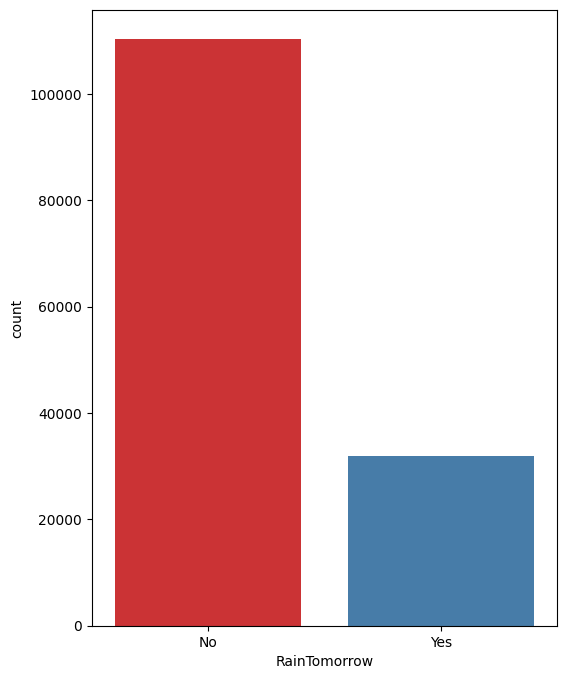

'\nx: Tham số này xác định biến phân loại (categorical variable) mà bạn muốn phân tích và hiển thị số lượng quan sát của nó. Biểu đồ sẽ hiển thị số lượng quan sát cho từng giá trị của biến này trên trục x.\n\ndata: Tham số này là dữ liệu (data frame) chứa biến phân loại và thông tin cần phân tích.\n'

In [13]:
df['RainTomorrow'].value_counts()/len(df)

f, ax = plt.subplots(figsize=(6, 8))
## Requirement 7:
## PUT YOUR CODE HERE:
ax = sns.countplot(x='RainTomorrow', data=df, palette="Set1")
plt.show()
"""
x: Tham số này xác định biến phân loại (categorical variable) mà bạn muốn phân tích và hiển thị số lượng quan sát của nó. Biểu đồ sẽ hiển thị số lượng quan sát cho từng giá trị của biến này trên trục x.

data: Tham số này là dữ liệu (data frame) chứa biến phân loại và thông tin cần phân tích.
"""

<details><summary> Hint </summary>

Use ```countplot```

</details>

In [14]:
df['RainTomorrow'].value_counts()/len(df)

RainTomorrow
No     0.775819
Yes    0.224181
Name: count, dtype: float64

**Kết quả của phân tích đơn biến**

- Số lượng nhãn trong biến RainTomorrow là 2.

- Hai giá trị nhãn là 'No' và 'Yes'.

- Trong tổng số giá trị của RainTomorrow, No xuất hiện 77,58% lần và Yes xuất hiện 22,42% lần.

- Biểu đồ đơn biến xác nhận những phát hiện của chúng ta rằng

    - No có 110316 giá trị và

    - Yes có 31877 giá trị.

## 2.3 Phân tích song biến

- Chúng ta sẽ tiến hành phân tích sâu hơn về 2 loại biến trong các mô hình máy học: biến hạng mục và biến giá trị số

### 2.3.1 Khám phá các biến hạng mục

In [15]:
# tìm các biến hạng mục

## Requirement 8:
## PUT YOUR CODE HERE:

categorical = [var for var in df.columns if df[var].dtype=='O']

print('Có {} biến hạng mục\n'.format(len(categorical)))

print('Các biến hạng mục đó là :',categorical)

Có 7 biến hạng mục

Các biến hạng mục đó là : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [16]:
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


**Tóm tắt các biến hạng mục**

- Có một biến ngày tháng. Đó là cột 'Date'.
- Có 6 biến hạng mục. Chúng là Location, WindGustDir, WindDir9am, WindDir3pm, RainToday và RainTomorrow.
- Có hai biến hạng mục nhị phân - RainToday và RainTomorrow.
- RainTomorrow là biến mục tiêu.

- Kiểm tra các giá trị bị khuyết

In [17]:
# kiểm tra các giá trị bị khuyết́ trong biến hạng mục

## Requirement 9:
## PUT YOUR CODE HERE:

cat1 = [var for var in categorical if df[var].isna().sum()!=0]

print(df[cat1].isna().sum())

WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64


<details><summary> Hint </summary>

Use ```isnull()```

</details>

- Số lượng nhãn trong từng biến hạng mục

In [18]:
# in ra số lượng nhãn của các biến hạng mục

for var in categorical:
    
    ## Requirement 10:
    ## PUT YOUR CODE HERE:
    print(var, ' chứa ', len(df[var].unique()), ' nhãn')

Date  chứa  3436  nhãn
Location  chứa  49  nhãn
WindGustDir  chứa  17  nhãn
WindDir9am  chứa  17  nhãn
WindDir3pm  chứa  17  nhãn
RainToday  chứa  3  nhãn
RainTomorrow  chứa  2  nhãn


<details><summary> Hint </summary>

Use ```unique()```

</details>

- Đếm tần suất của các biến hạng mục (do biến 'Date chứa quá nhiều nhãn nên chúng ta vẽ bỏ qua biến này trong việc vẽ đồ thị tần suất)

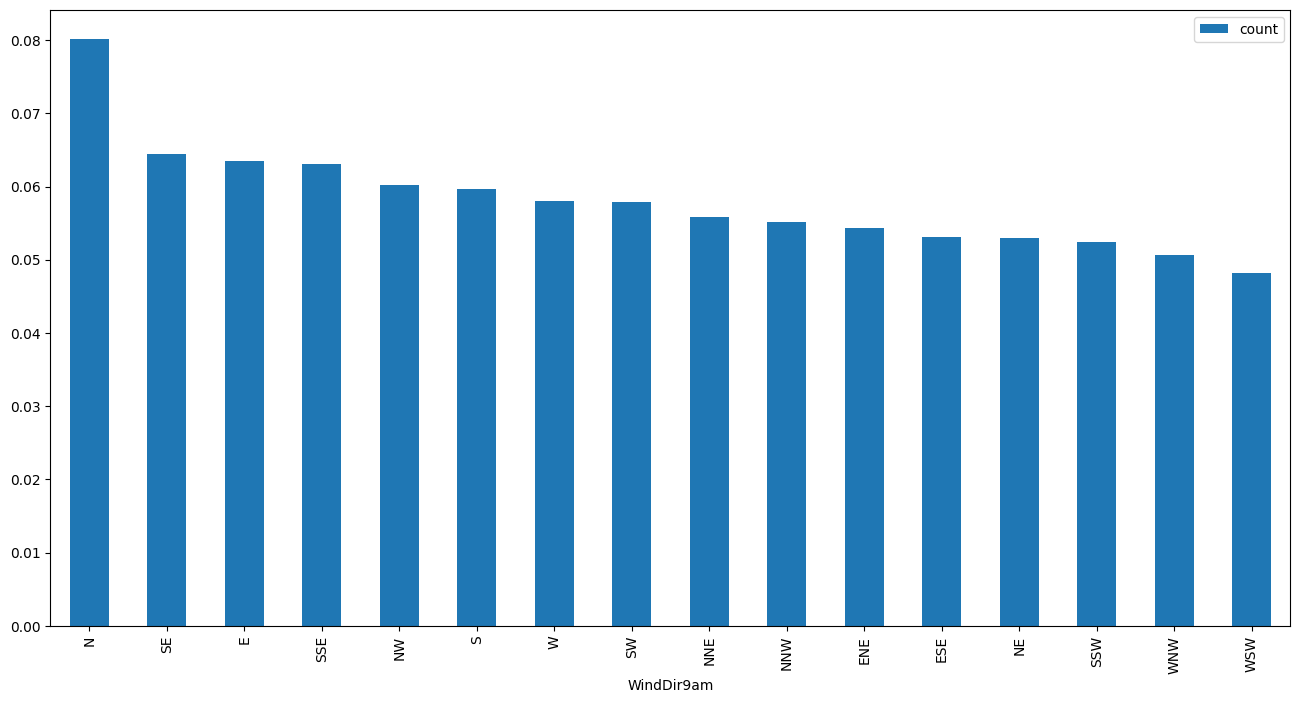

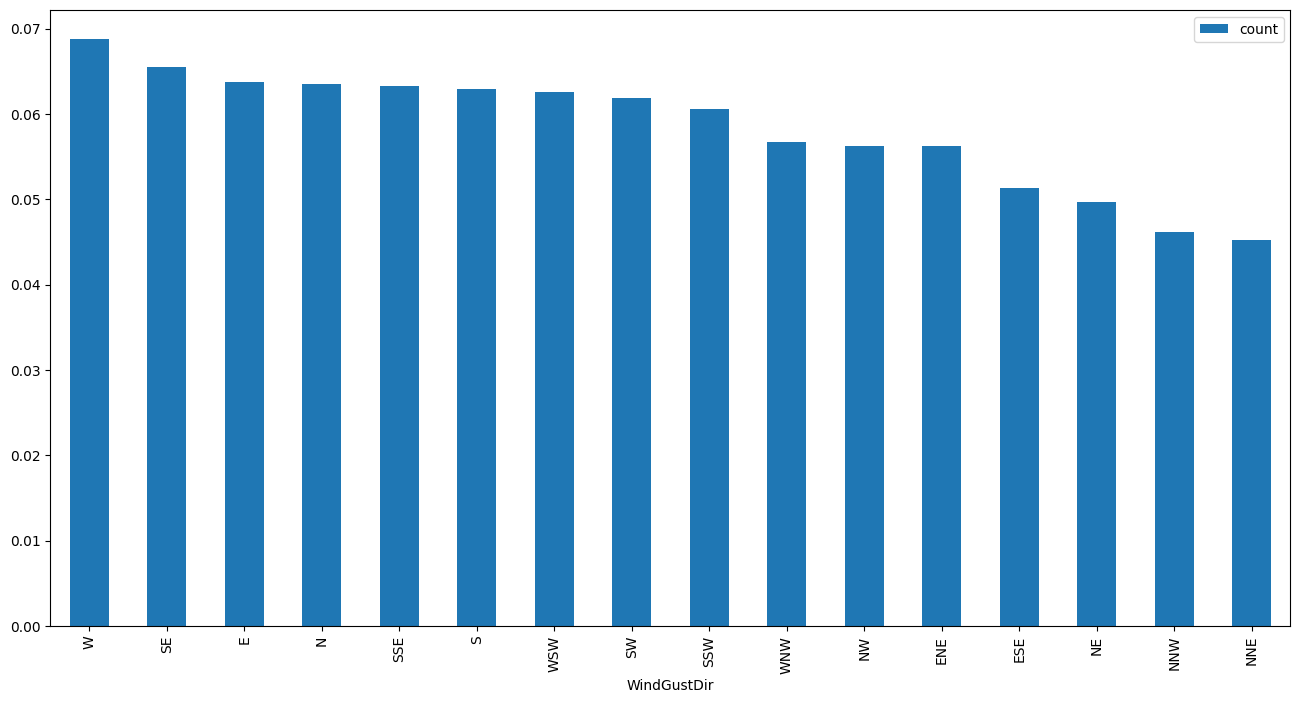

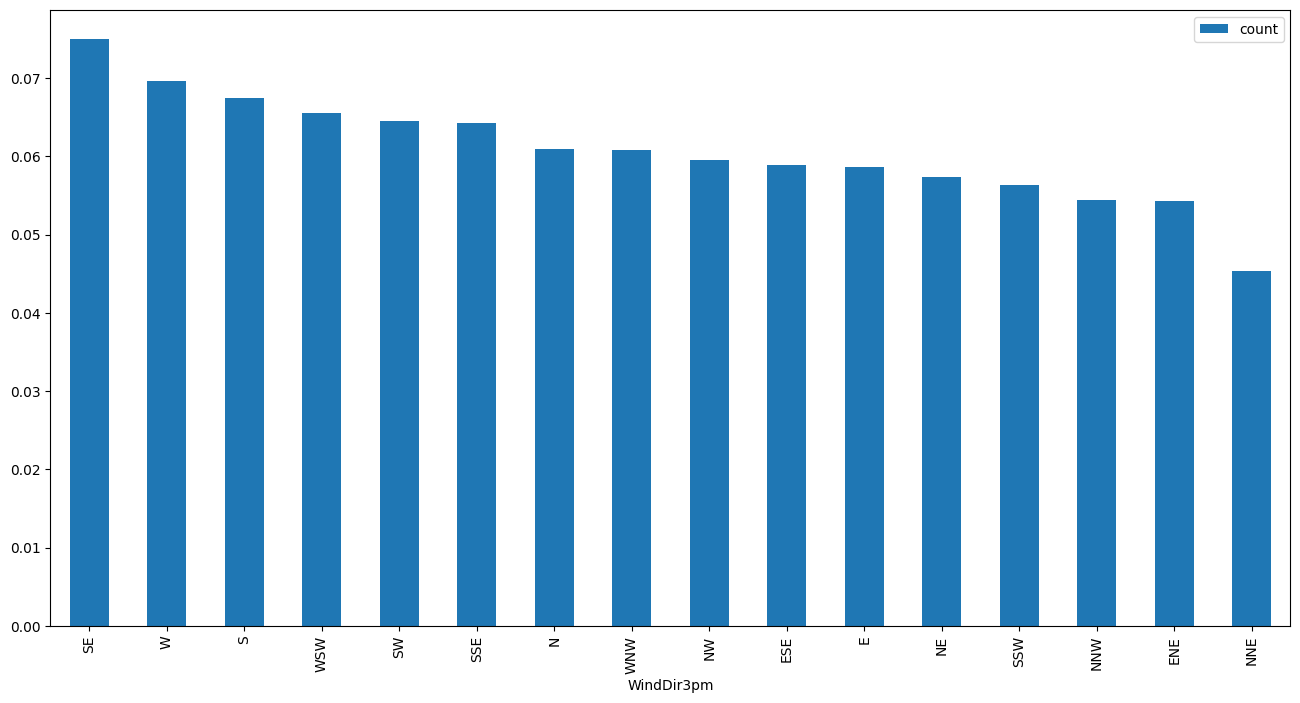

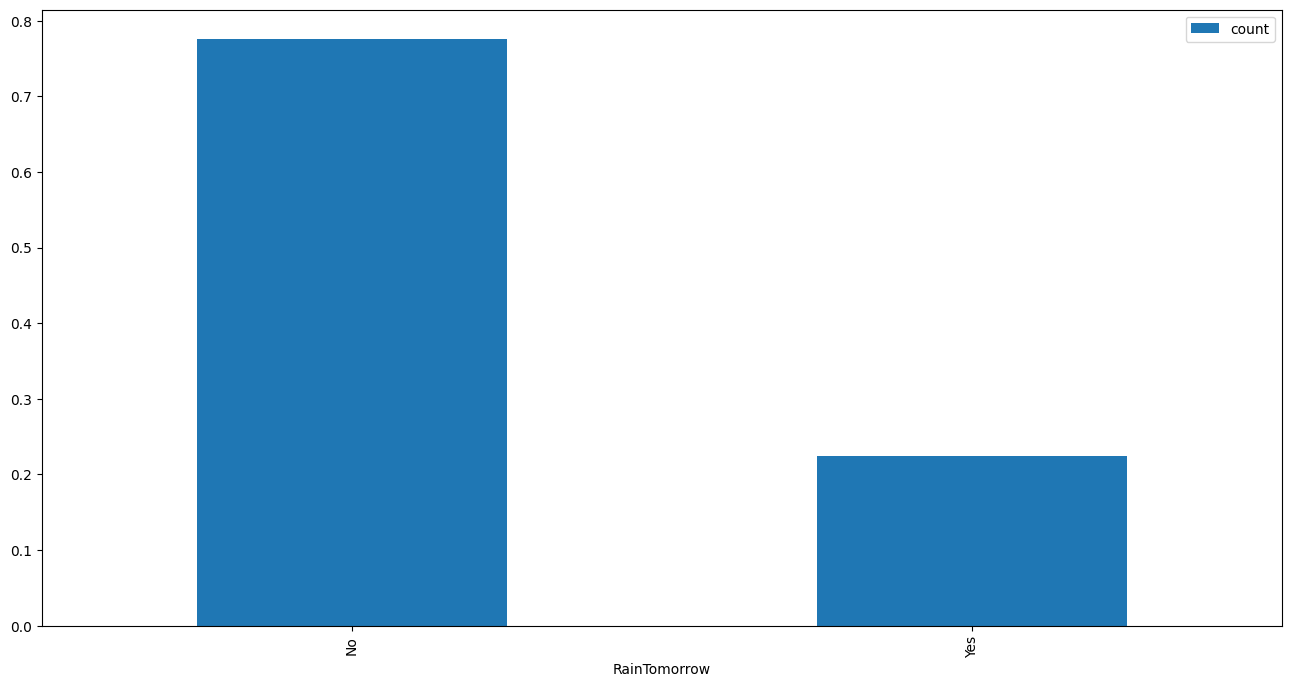

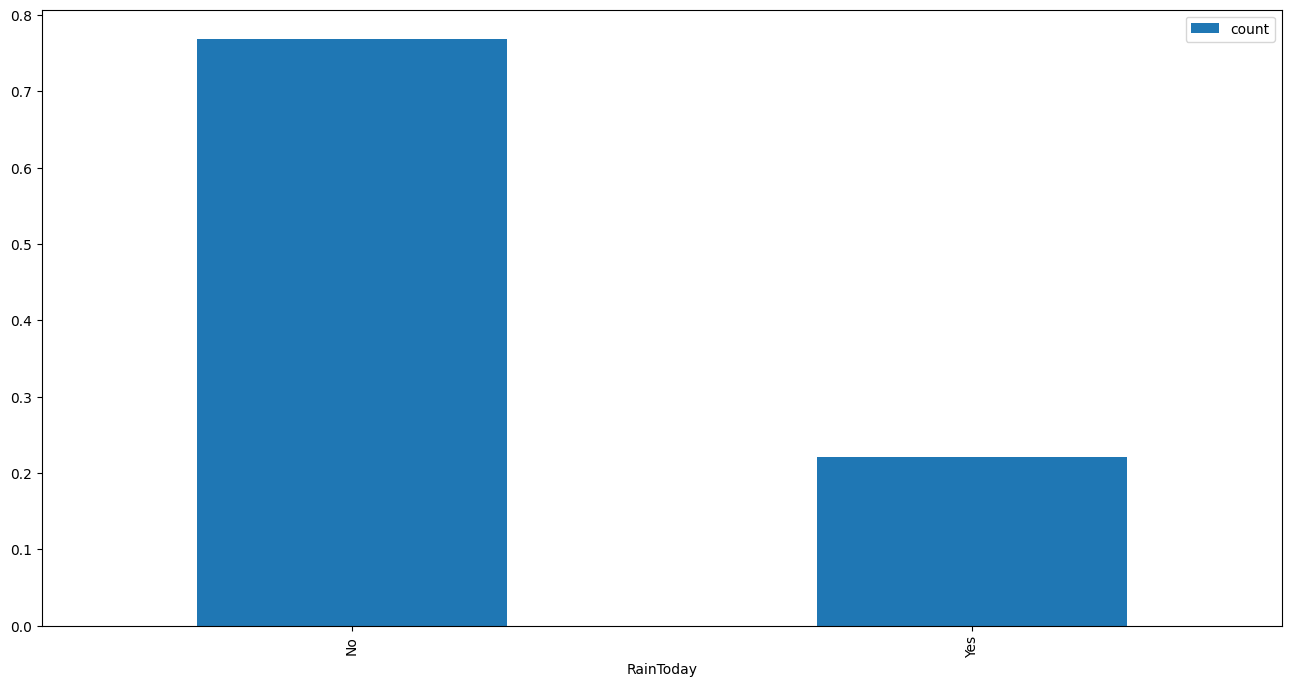

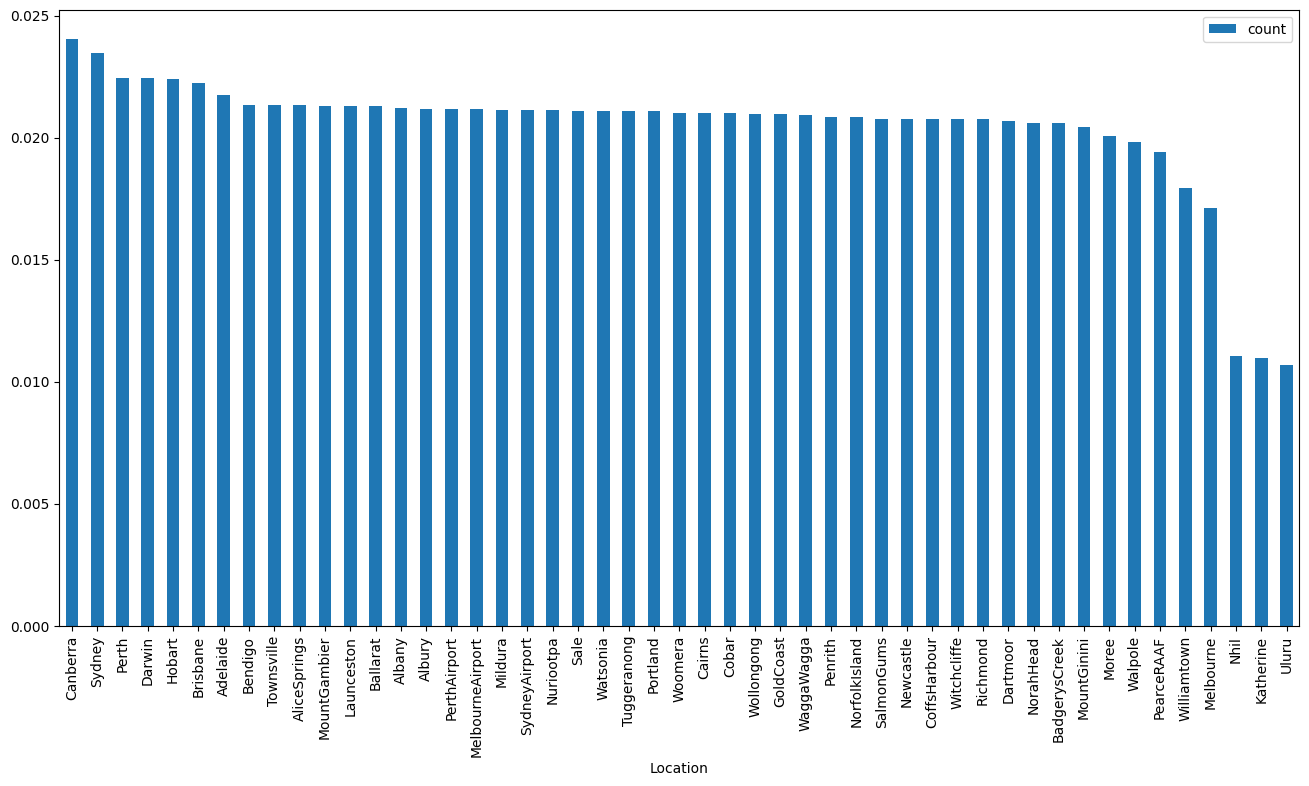

In [19]:
# vẽ đồ thị cột biễu diễn tỉ lệ tần suất các nhãn của từng biến hạng mục

for var in set(categorical) - {'Date'}: 
    ## Requirement 11:
    ## PUT YOUR CODE HERE:
    f, ax = plt.subplots(figsize=(16, 8))
    data_plot = df[var].value_counts()/(len(df))
    ax = data_plot.plot(kind="bar") #bar chart
    ax.legend()
    plt.show()

<details><summary> Hint </summary>

[value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)

</details>

### 2.3.2 Khám phá các biến giá trị số

In [20]:
# tìm các biến giá trị số

## Requirement 12:
## PUT YOUR CODE HERE:

numerical = [var for var in df.columns if df[var].dtype!='O']

print('Có {} biến giá trị số\n'.format(len(numerical)))

print('Các biến giá trị số đó là :', numerical)

Có 16 biến giá trị số

Các biến giá trị số đó là : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [21]:
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


**Tóm tắt các biến giá trị số**
- Có 16 biến giá trị số.
- Chúng là MinTemp, MaxTemp, Lượng mưa, Bốc hơi, Ánh nắng mặt trời, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp 9am và Temp3pm.
- Tất cả các biến giá trị số đều thuộc có giá trị liên tục.

- kiểm tra các giá trị bị khuyết́

In [22]:
# kiểm tra các giá trị bị khuyết́ trong biến giá trị số

## Requirement 13:
## PUT YOUR CODE HERE:

num1 = [var for var in numerical if df[var].isna().sum()!=0]

print(df[num1].isna().sum())

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
dtype: int64


In [23]:
df[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


- Tìm các dữ liệu ngoại lai

In [24]:
# tìm các dữ liệu ngoại lai trong từng biến giá trị số

## Requirement 14:
## PUT YOUR CODE HERE:

for var in numerical:
    IQR = df[var].quantile(0.75) - df[var].quantile(0.25)
    Lower_fence = df[var].quantile(0.25) - (IQR * 3)
    Upper_fence = df[var].quantile(0.75) + (IQR * 3)
    print('Dữ liệu ngoại lai của biến', var, 'là các giá trị < {lowerboundary} hoặc > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Dữ liệu ngoại lai của biến MinTemp là các giá trị < -20.0 hoặc > 44.400000000000006
Dữ liệu ngoại lai của biến MaxTemp là các giá trị < -13.000000000000004 hoặc > 59.1
Dữ liệu ngoại lai của biến Rainfall là các giá trị < -2.4000000000000004 hoặc > 3.2
Dữ liệu ngoại lai của biến Evaporation là các giá trị < -11.800000000000002 hoặc > 21.800000000000004
Dữ liệu ngoại lai của biến Sunshine là các giá trị < -12.199999999999998 hoặc > 27.699999999999996
Dữ liệu ngoại lai của biến WindGustSpeed là các giá trị < -20.0 hoặc > 99.0
Dữ liệu ngoại lai của biến WindSpeed9am là các giá trị < -29.0 hoặc > 55.0
Dữ liệu ngoại lai của biến WindSpeed3pm là các giá trị < -20.0 hoặc > 57.0
Dữ liệu ngoại lai của biến Humidity9am là các giá trị < -21.0 hoặc > 161.0
Dữ liệu ngoại lai của biến Humidity3pm là các giá trị < -50.0 hoặc > 153.0
Dữ liệu ngoại lai của biến Pressure9am là các giá trị < 984.4 hoặc > 1050.9
Dữ liệu ngoại lai của biến Pressure3pm là các giá trị < 981.5999999999999 hoặc > 1048.800000000

<details><summary> Hint </summary>

[quantile()](https://pandas.pydata.org/docs/reference/api/pandas.Series.quantile.html)

</details>

## 2.4 Phân tích đa biến

- Vễ bản đồ nhiệt (heat map) của ma trận tương quan

In [25]:
# tìm ma trận tương quan
## Requirement 15:
## PUT YOUR CODE HERE:
correlation = df[numerical].corr() # chỉ áp dụng dữ liệu số

<details><summary> Hint </summary>

[corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)

</details>

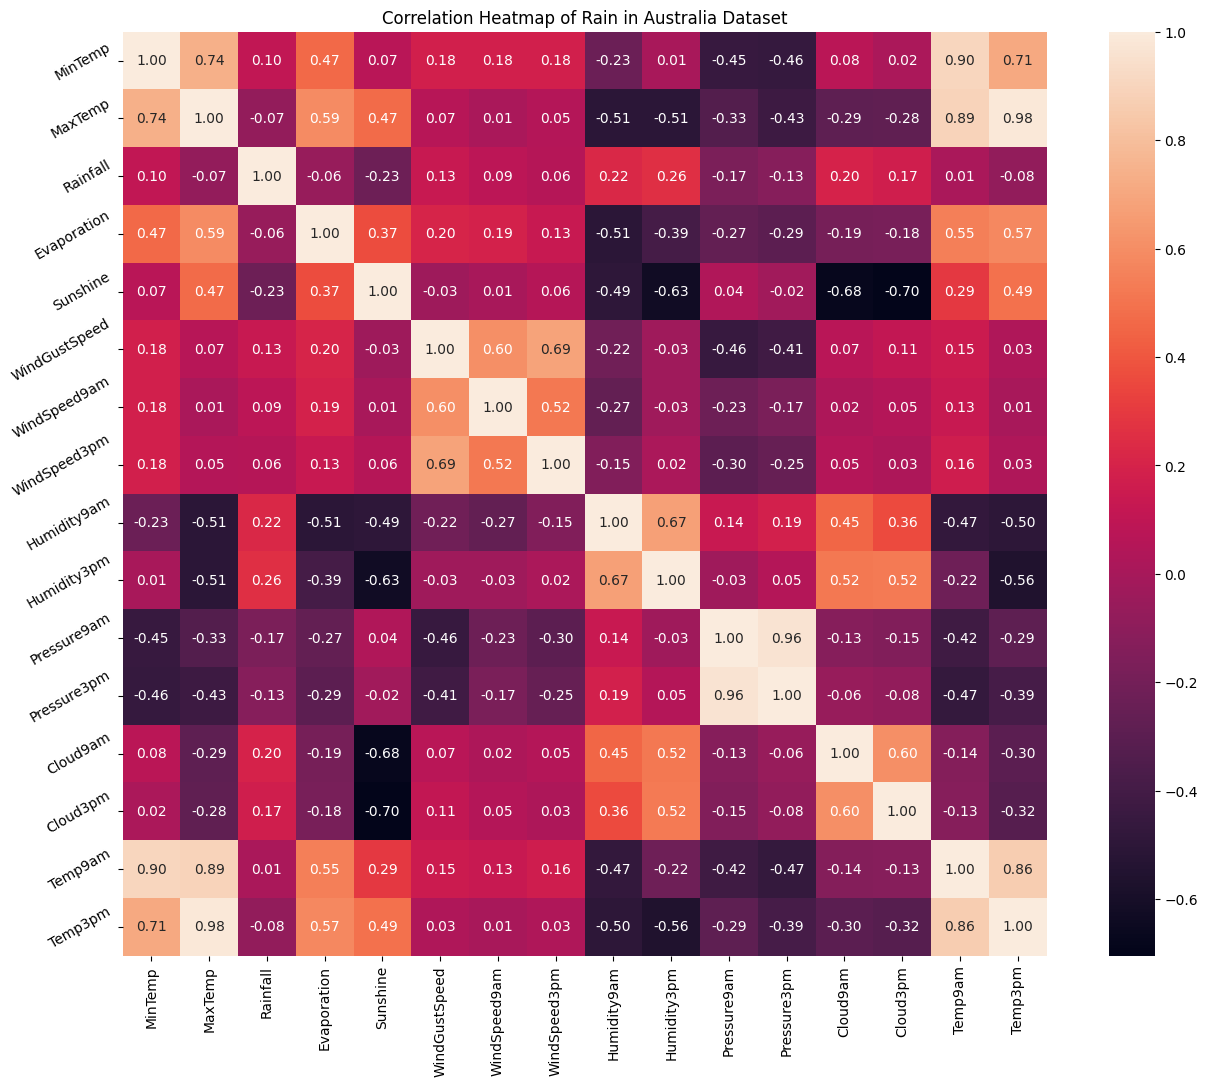

In [26]:
# Vẽ bản đồ nhiệt

plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
## Requirement 16:
## PUT YOUR CODE HERE:
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

<details><summary> Hint </summary>

Use ```heatmap()``` and ```correlation```

</details>

Diễn dịch: Từ bản đồ nhiệt tương quan trên, chúng ta có thể kết luận rằng:

- Biến MinTemp và MaxTemp có tương quan thuận rất cao (hệ số tương quan = 0.74).

- Các biến MinTemp và Temp3pm cũng có tương quan thuận cao (hệ số tương quan = 0.71).

- Các biến MinTemp và Temp9am có tương quan thuận rất chặt chẽ (hệ số tương quan = 0.90).

- Các biến MaxTemp và Temp9am có tương quan thuận rất chặt chẽ (hệ số tương quan = 0.89).

- Các biến MaxTemp và Temp3pm cũng có tương quan thuận mạnh (hệ số tương quan = 0.98).

- Các biến WindGustSpeed và WindSpeed3pm có tương quan thuận rất cao (hệ số tương quan = 0.69).

- Các biến Pressure9am và Pressure3pm có mối tương quan thuận chặt chẽ với nhau (hệ số tương quan = 0.96).

- Các biến Temp9am và Temp3pm có tương quan thuận rất chặt chẽ (hệ số tương quan = 0.86).

- Thể hiện rõ hơn mối quan hệ tương quan của các biến có mức độ tương quan mạnh

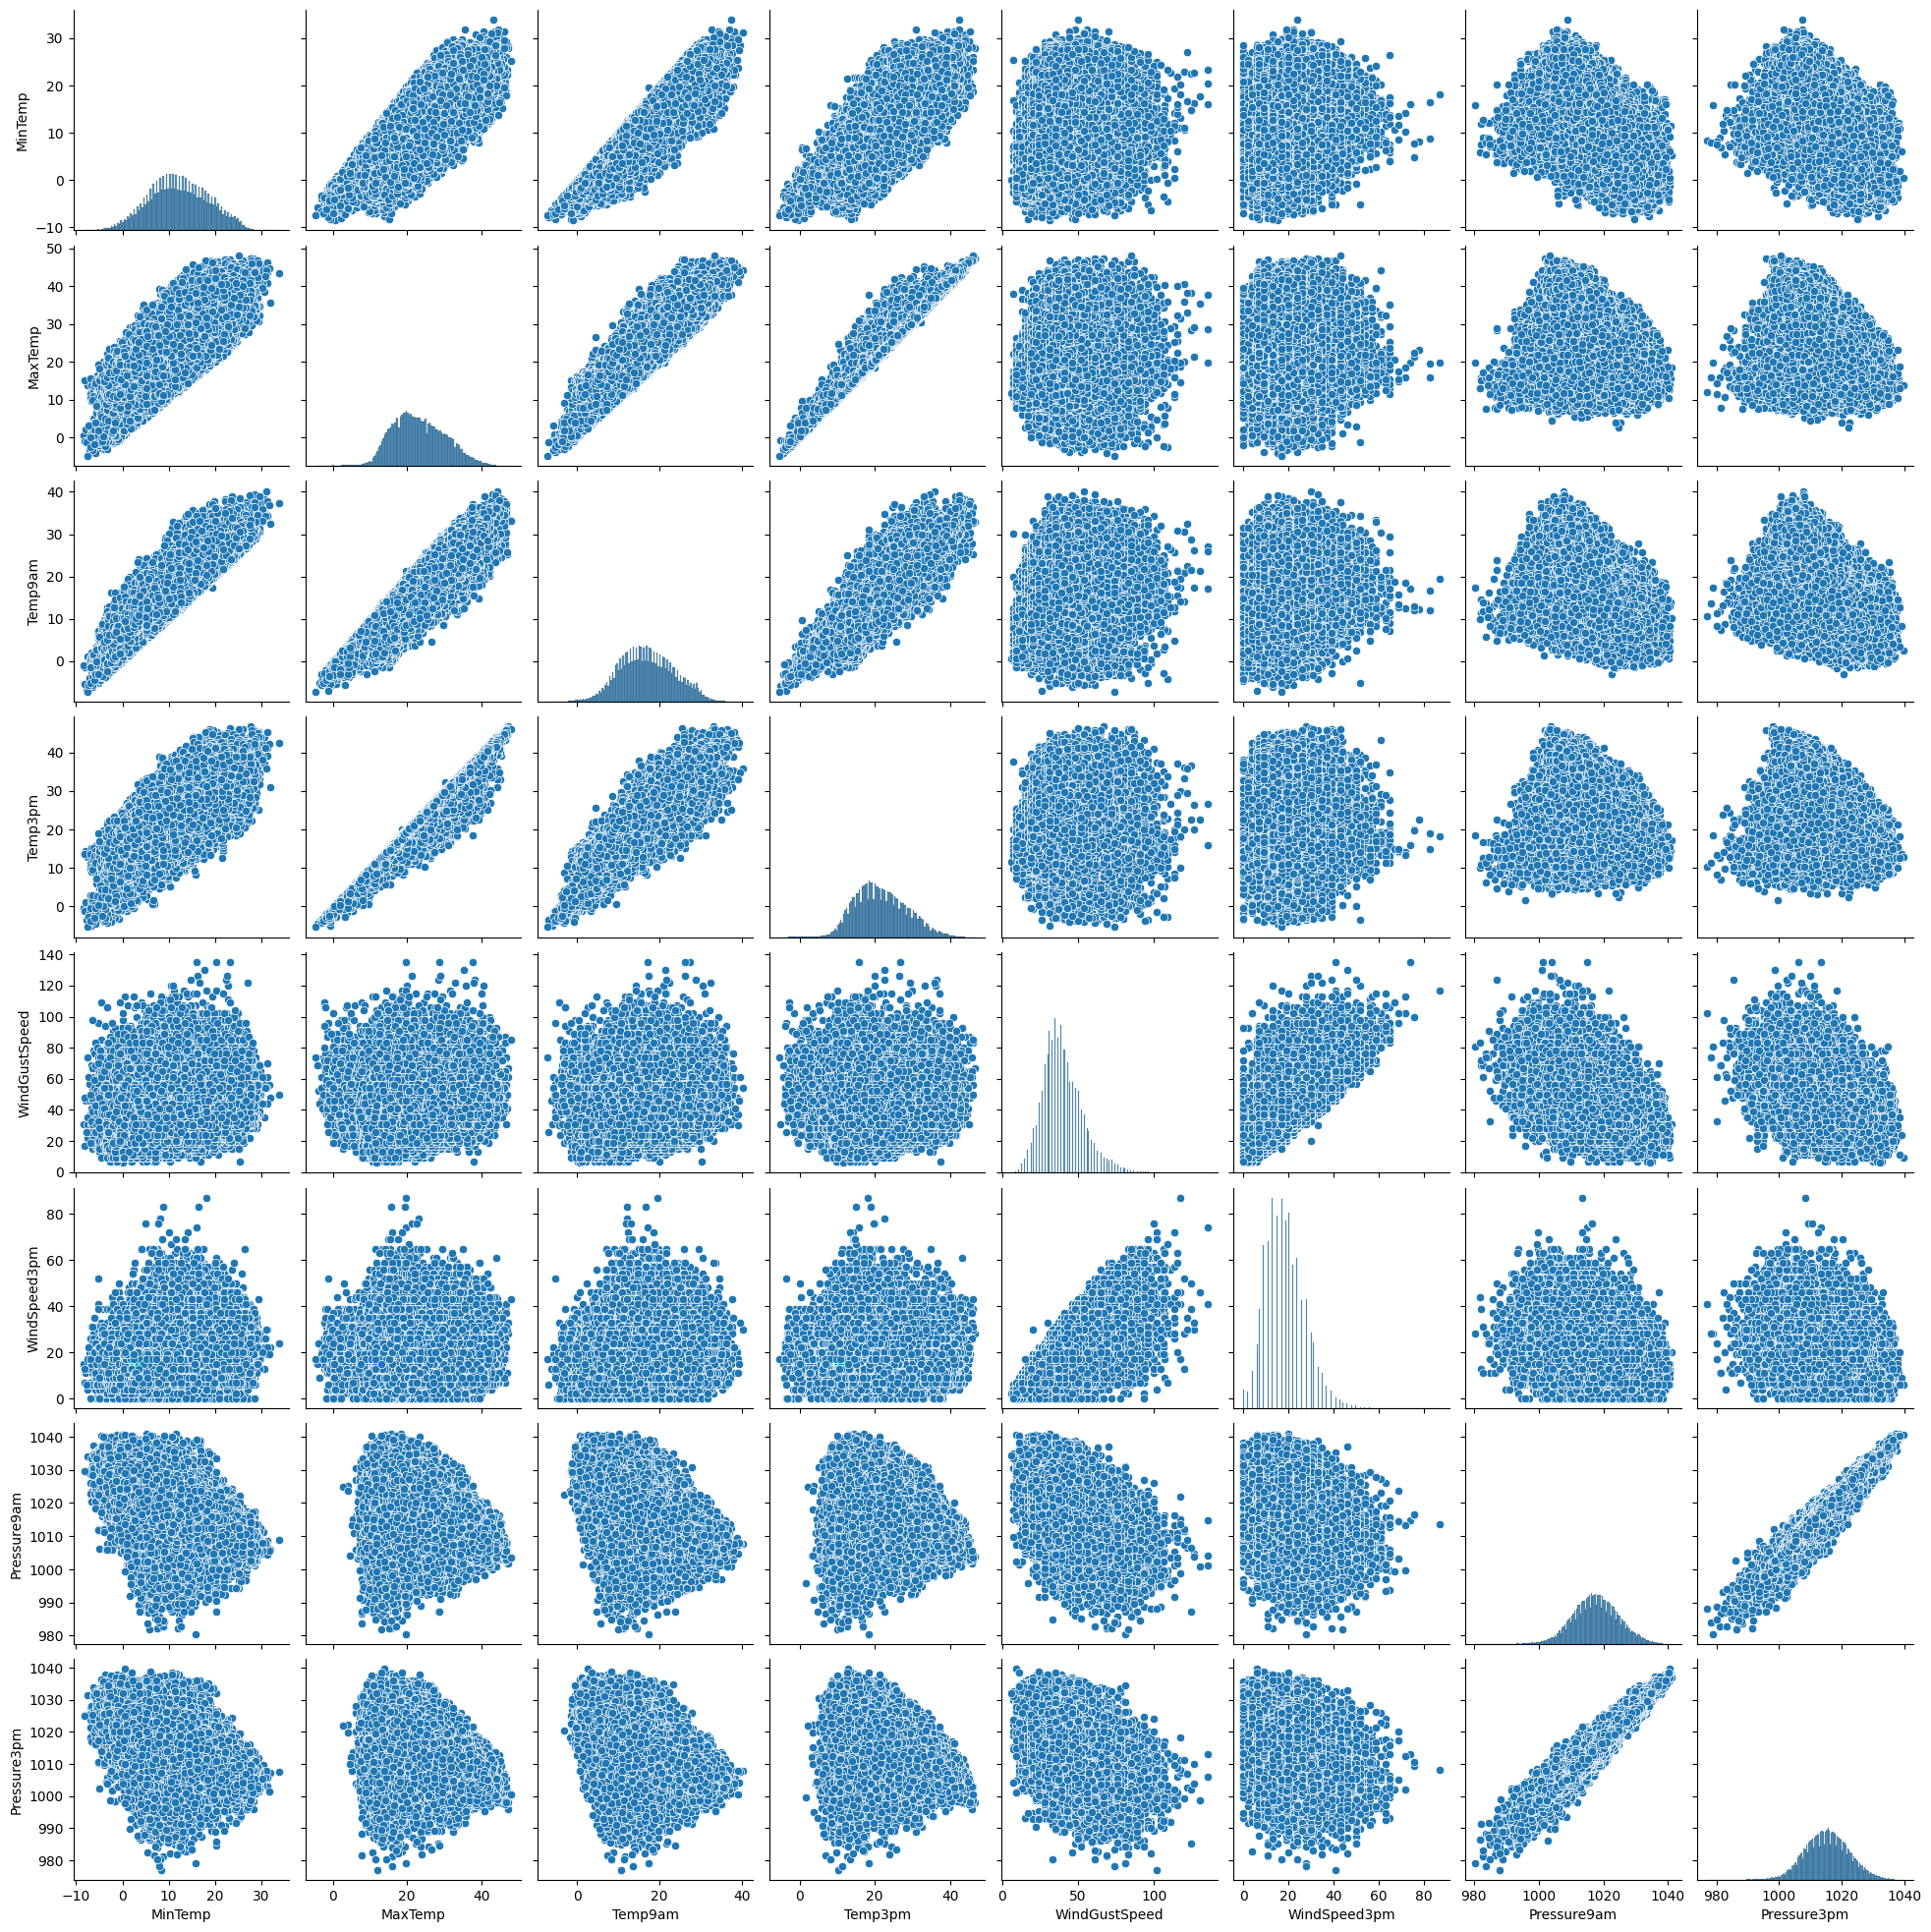

In [27]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']
## Requirement 17:
## PUT YOUR CODE HERE:
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

<details><summary> Hint </summary>

Use ```pairplot()```

</details>

# 3.Tiền xử lý dữ liệu

Chúng ta sẽ tiến hành làm sạch dữ liệu trước khi chúng ta huấn luyện mô hình. Ở bước này chúng ta sẽ:

1. Điền giá trị vào các đặc trưng bị khuyết
2. Loại bỏ các ngoại lai
3. Mã hóa các đặc trưng tùy vào loại biến

- Chuẩn bị tập dữ liệu

In [28]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

- Chia biến hạng mục và biến giá trị số

In [29]:
## Requirement 18:
## PUT YOUR CODE HERE:

categorical = [col for col in X.columns if X[col].dtypes == 'O']
numerical = [col for col in X.columns if X[col].dtypes != 'O']

- Chia dữ liệu thành tập huấn luyện và tập kiểm tra

In [30]:
from sklearn.model_selection import train_test_split

## Requirement 19:
## PUT YOUR CODE HERE:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [31]:
X_train.shape, X_test.shape

((113754, 22), (28439, 22))

## 3.1 Xử lý đặc trưng bị khuyết

- Điền các giá trị bị khuyết tùy vào loại biến

### 3.1.1 Biến giá trị số

In [32]:
# Điền các giá trị khuyết bằng giá trị median

## Requirement 20:
## PUT YOUR CODE HERE:

for df1 in [X_train, X_test]:
    for col in numerical:
        col_median = X_train[col].median() #tính TBC của X_train
        df1[col].fillna(col_median, inplace=True) #điền dư liệu khuyết bằng TBC

<details><summary> Hint </summary>

[median()](https://pandas.pydata.org/docs/reference/api/pandas.Series.median.html)

[fillna()](https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html)

</details>

- Kiểm tra lại liệu tập dữ liệu còn giá trị bị khuyết

In [33]:
X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [34]:
X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

### 3.1.2 Biến hạng mục

In [35]:
# Điền các giá trị khuyết bằng giá trị mode

## Requirement 21:
## PUT YOUR CODE HERE:

for df2 in [X_train, X_test]:
    for var in categorical:
        df2[var].fillna(X_train[var].mode()[0], inplace=True)

<details><summary> Hint </summary>

[mode()](https://pandas.pydata.org/docs/reference/api/pandas.Series.mode.html)

[fillna()](https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html)

</details>

- Kiểm tra lại liệu tập dữ liệu còn giá trị bị khuyết

In [36]:
X_train[categorical].isnull().sum()

Date           0
Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [37]:
X_test[categorical].isnull().sum()

Date           0
Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

## 3.2 Xử lý ngoại lai của biến giá trị số

Chúng ta đã thấy rằng các cột Rainfall, Evaporation, WindSpeed9am và WindSpeed3pm chứa các giá trị ngoại lai. Chúng ta sẽ giới hạn các giá trị tối đa và loại bỏ các giá trị ngoại lai khỏi các biến ở trên.

In [38]:
## Requirement 22:
## PUT YOUR CODE HERE:

def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3[ 'Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

<details><summary> Hint </summary>

Use function ```max_value()```

</details>

In [39]:
for var in ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']:
    print(var, X_train[var].max(), X_test[var].max())

Rainfall 3.2 3.2
Evaporation 21.8 21.8
WindSpeed9am 55.0 55.0
WindSpeed3pm 57.0 57.0


In [40]:
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.193497,23.237216,0.675080,5.151606,8.041154,39.884074,13.978155,18.614756,68.867486,51.509547,1017.640649,1015.241101,4.651801,4.703588,16.995062,21.688643
std,6.388279,7.094149,1.183837,2.823707,2.769480,13.116959,8.806558,8.685862,18.935587,20.530723,6.738680,6.675168,2.292726,2.117847,6.463772,6.855649
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,40.200000,46.700000


## 3.3 Mã hóa các biến hạng mục

**Lưu ý**: học viên nên cái đặt thư viện [category_encoders](https://contrib.scikit-learn.org/category_encoders/) trước khi bắt đầu phần này

- Mã hóa số nguyên cho biến mục tiêu

In [41]:
# mã hóa biến mục tiêu

## Requirement 23:
## PUT YOUR CODE HERE:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

<details><summary> Hint </summary>

[LabelEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

</details>

- Mã hóa nhị phân cho biến RainToday

In [42]:
# mã hóa biến RainToday

import category_encoders as ce

## Requirement 24:
## PUT YOUR CODE HERE:

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train_target = encoder.fit_transform(X_train)

X_test_target = encoder.transform(X_test)

<details><summary> Hint </summary>

[BinaryEncoder()](https://contrib.scikit-learn.org/category_encoders/binary.html)

</details>

In [43]:
X_train_target.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1
110803,2014-04-25,Witchcliffe,13.9,22.6,0.2,4.8,8.5,S,41.0,SSE,...,65.0,55.0,1013.9,1013.4,5.0,5.0,18.8,20.4,0,1
87289,2015-11-02,Cairns,22.4,29.4,2.0,6.0,6.3,ENE,33.0,SSE,...,71.0,59.0,1016.9,1013.1,7.0,5.0,26.4,27.5,1,0
134949,2014-10-19,AliceSprings,9.7,36.2,0.0,11.4,12.3,E,31.0,NE,...,6.0,2.0,1018.1,1013.6,1.0,1.0,28.5,35.0,0,1
85553,2010-10-30,Cairns,20.5,30.1,0.0,8.8,11.1,ESE,37.0,SSE,...,59.0,53.0,1014.1,1010.8,2.0,3.0,27.3,29.4,0,1
16110,2012-11-08,Newcastle,16.8,29.2,0.0,4.8,8.5,W,39.0,N,...,72.0,53.0,1017.6,1015.2,5.0,8.0,22.2,27.0,0,1


- Chúng ta có thể thấy rằng hai biến bổ sung ```RainToday_0``` và ```RainToday_1``` được tạo từ biến RainToday.

- Mã hóa One-hot các biến hạng mục phụ thuộc

Cho tập train

In [44]:
## Requirement 25:
## PUT YOUR CODE HERE:

col_categorical = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

X_train_categorical = pd.concat([X_train_target[['RainToday_0', 'RainToday_1']], # concat để nối features dọc theo axis =1
                      pd.get_dummies(X_train[col_categorical])], axis=1) #mã hóa theo cột 

<details><summary> Hint </summary>

[get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

</details>

In [45]:
X_train_categorical.head()

,RainToday_0,RainToday_1,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
110803,0,1,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
87289,1,0,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
134949,0,1,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
85553,0,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16110,0,1,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


Cho tập test

In [46]:
## Requirement 26:
## PUT YOUR CODE HERE:

X_test_categorical = pd.concat([X_test_target[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test[col_categorical])], axis=1)

<details><summary> Hint </summary>

[get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

</details>

In [47]:
X_test_categorical.head()

,RainToday_0,RainToday_1,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
86232,0,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
57576,0,1,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
124071,1,0,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
117955,0,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
133468,1,0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 3.4 Rời rạc hóa dữ liệu giá trị số

- Chúng ta sẽ rời rạc hóa dữ liệu giá trị số thành dữ liệu hạng mục

In [48]:
from feature_engine.discretisation import EqualFrequencyDiscretiser

## Requirement 27:
## PUT YOUR CODE HERE:

disc = EqualFrequencyDiscretiser(q=10, variables =numerical)

disc.fit(X_train[numerical])

EqualFrequencyDiscretiser(variables=['MinTemp', 'MaxTemp', 'Rainfall',
                                     'Evaporation', 'Sunshine', 'WindGustSpeed',
                                     'WindSpeed9am', 'WindSpeed3pm',
                                     'Humidity9am', 'Humidity3pm',
                                     'Pressure9am', 'Pressure3pm', 'Cloud9am',
                                     'Cloud3pm', 'Temp9am', 'Temp3pm'])

<details><summary> Hint </summary>

[EqualFrequencyDiscretiser()](https://feature-engine.readthedocs.io/en/latest/discretisation/EqualFrequencyDiscretiser.html)

</details>

In [49]:
disc.binner_dict_

{'MinTemp': [-inf, 4.0, 6.6, 8.5, 10.3, 12.0, 13.8, 15.7, 18.0, 20.8, inf],
 'MaxTemp': [-inf, 14.5, 17.0, 18.9, 20.7, 22.6, 24.7, 27.0, 29.6, 32.9, inf],
 'Rainfall': [-inf, 0.2, 1.6, inf],
 'Evaporation': [-inf, 2.0, 3.4, 4.8, 6.2, 8.2, inf],
 'Sunshine': [-inf, 3.7, 7.0, 8.5, 9.6, 11.1, inf],
 'WindGustSpeed': [-inf,
  24.0,
  30.0,
  33.0,
  35.0,
  39.0,
  41.0,
  44.0,
  50.0,
  57.0,
  inf],
 'WindSpeed9am': [-inf,
  4.0,
  7.0,
  9.0,
  11.0,
  13.0,
  15.0,
  19.0,
  20.0,
  26.0,
  inf],
 'WindSpeed3pm': [-inf,
  9.0,
  11.0,
  13.0,
  15.0,
  19.0,
  20.0,
  22.0,
  26.0,
  30.0,
  inf],
 'Humidity9am': [-inf,
  44.0,
  54.0,
  60.0,
  65.0,
  70.0,
  75.0,
  80.0,
  86.0,
  94.0,
  inf],
 'Humidity3pm': [-inf,
  23.0,
  33.0,
  41.0,
  47.0,
  52.0,
  57.0,
  62.0,
  69.0,
  79.0,
  inf],
 'Pressure9am': [-inf,
  1009.2,
  1012.3,
  1014.6,
  1016.6,
  1017.6,
  1018.6,
  1020.7,
  1023.0,
  1026.3,
  inf],
 'Pressure3pm': [-inf,
  1006.8,
  1009.8,
  1012.1,
  1014.2,
  10

In [50]:
## Requirement 28:
## PUT YOUR CODE HERE:

X_train_numerical = disc.transform(X_train[numerical])
X_test_numerical = disc.transform(X_test[numerical])

<details><summary> Hint </summary>

Remember ```numerical```

</details>

In [51]:
X_train_numerical.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
110803,6,4,0,2,2,5,7,8,3,5,2,3,2,2,6,4
87289,9,7,2,3,1,2,1,4,5,6,4,3,3,2,9,7
134949,3,9,0,5,5,2,5,1,0,0,5,3,0,0,9,9
85553,8,8,0,5,4,4,8,4,2,5,2,2,1,1,9,8
16110,7,7,0,2,2,4,0,0,5,5,4,4,2,4,7,7


In [52]:
X_test_numerical.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
86232,7,7,0,2,4,2,3,4,3,6,2,1,0,0,9,8
57576,2,0,1,0,2,7,6,6,6,5,1,3,2,2,1,0
124071,3,1,2,2,2,2,4,0,4,6,2,5,2,2,2,0
117955,6,9,0,4,5,5,2,4,0,0,6,6,0,0,8,9
133468,2,0,2,0,2,1,5,2,8,3,9,9,3,0,0,1


- Ghép 2 tập  dữ liệu hạng mục và giá trị số sau khi đã xử lý

In [53]:
train = pd.concat([X_train_numerical, X_train_categorical], axis=1)
test = pd.concat([X_test_numerical, X_test_categorical], axis=1)

In [54]:
train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
110803,6,4,0,2,2,5,7,8,3,5,...,False,False,True,False,False,False,False,False,False,False
87289,9,7,2,3,1,2,1,4,5,6,...,False,False,False,True,False,False,False,False,False,False
134949,3,9,0,5,5,2,5,1,0,0,...,False,False,False,False,False,False,False,False,False,False
85553,8,8,0,5,4,4,8,4,2,5,...,False,False,False,False,False,False,False,False,False,False
16110,7,7,0,2,2,4,0,0,5,5,...,False,False,False,True,False,False,False,False,False,False


In [55]:
test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
86232,7,7,0,2,4,2,3,4,3,6,...,False,False,False,False,False,False,False,False,False,False
57576,2,0,1,0,2,7,6,6,6,5,...,False,False,True,False,False,False,False,False,False,False
124071,3,1,2,2,2,2,4,0,4,6,...,False,False,False,False,True,False,False,False,False,False
117955,6,9,0,4,5,5,2,4,0,0,...,False,False,False,False,False,False,True,False,False,False
133468,2,0,2,0,2,1,5,2,8,3,...,False,False,False,False,False,False,False,False,False,False


# 4.Lựa chọn đặc trưng

Ở bước này chúng ta sẽ thực hiện các phương pháp lựa chọn đặc trưng sau:

1. Loại các đặc trưng trùng.
2. Loại các đặc trưng quasi-constant.
3. Lựa chọn đặc trưng

  - Lựa chọn đặc trưng dựa trên chỉ số ROC-AUC. 
  - Lựa chọn đặc trưng bằng cách tính hệ số feature importance bằng mô hình Random Forest.

Sau đó chúng ta sẽ so sánh 2 phương pháp ROC-AUC và Random Forest để xem phương pháp nào sẽ cho ra kết quả dự đoán tốt hơn.

Tuy nhiên vẫn còn các cách lựa chọn đặc trưng khác như sử dụng chỉ số MSE hay là các phương pháp đệ quy. Học viên nên thử nghiệm thêm các phương pháp khác ngoài 4 phương pháp kể trên để cho ra các kết quả tốt nhất có thể.

## 4.1 Loại các đặc trưng bị trùng

- Đầu tiên là chúng ta sẽ loại bỏ các đặc trưng bị trùng

In [56]:
duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:
        print(i)

    col_1 = train.columns[i]
    ## Requirement 29:
    ## PUT YOUR CODE HERE:
    for col_2 in train.columns[i + 1:]:
        if train[col_1].equals(train[col_2]):
            duplicated_feat.append(col_2)
            
len(duplicated_feat)

0
10
20


0

In [57]:
## Requirement 31:
## PUT YOUR CODE HERE:

train.drop(labels=duplicated_feat, axis=1, inplace=True)
test.drop(labels=duplicated_feat, axis=1, inplace=True)

train.shape, test.shape

((113754, 115), (28439, 115))

## 4.2 Loại bỏ các đặc trưng Quasi-constant

- Kế tiếp chúng ta sẽ loại các đặc trưng quasi-constant

In [58]:
quasi_constant_feat = []

## Requirement 31:
## PUT YOUR CODE HERE:

for feature in train.columns:

    predominant = (train[feature].value_counts() / (
        len(train))).sort_values(ascending=False).values[0]

    if predominant > 0.998:
        
        quasi_constant_feat.append(feature)

train.drop(labels=quasi_constant_feat, axis=1, inplace=True)
test.drop(labels=quasi_constant_feat, axis=1, inplace=True)

train.shape, test.shape

((113754, 115), (28439, 115))

## 4.3 Lựa chọn đặc trưng bằng chỉ số ROC-AUC

ROC-AUC là một phương pháp tính toán hiệu suất của một mô hình phân loại theo các ngưỡng phân loại khác nhau. Giả sử với bài toán phân loại nhị phân (2 lớp) sử dụng hồi quy logistic (logistic regression), việc chọn các ngưỡng phân loại [0..1] khác nhau sẽ ảnh hưởng đến khả năng phân loại của mô hình và ta cần tính toán được mức độ ảnh hưởng của các ngưỡng. AUC là từ viết tắt của Area Under The Curve còn ROC viết tắt của Receiver Operating Characteristics. ROC là một đường cong biểu diễn xác suất và AUC biểu diễn mức độ phân loại của mô hình. ROC-AUC càng gần 1 thì kết quả dự đoán càng chính xác và xác suất để dự đoán đúng nhãn của một dữ liệu mẫu cũng sẽ càng cao. Do đó đặc trưng nào có chỉ số ROC-AUC càng cao thì càng cho thấy mức độ ảnh hưởng của đặc trưng đó trong việc đưa ra dự đoán của các mô hình máy học. Và chúng ta sẽ lựa chọn các đặc trưng này để mô hình của chúng ta vẫn có kết quả dự đoán chính xác mà không cần phải tốn quá nhiều tài nguyên máy tính.

- Như đã nói ở trên, chỉ số ROC-AUC càng gần 1 thì mô hình càng phân loại chính xác. ROC-AUC càng gần 0.5 thì hiệu suất phân loại càng tệ còn nếu gần 0 thì mô hình sẽ cho ra kết quả phân loại ngược với kết quả chúng ta mong muốn. Do vậy, chúng ta sẽ lựa chọn các đặc trưng có chỉ số ROC-AUC > 0.51 và loại bỏ các đặc trưng còn lại.

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [60]:
# xác định roc-auc cho mỗi đặc trưng

roc_values = []

## Requirement 32:
## PUT YOUR CODE HERE:

for feature in train.columns:

    # train a decision tree classifier
    clf = DecisionTreeClassifier()
    clf.fit(train[feature].values.reshape(-1, 1), y_train)

    # obtain the predictions
    y_scored = clf.predict_proba(test[feature].values.reshape(-1, 1))

    # calculate and store the roc-auc
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))
    
# display the result
roc_values[0:10]

[0.5634856648833344,
 0.6110053654152788,
 0.67765553549737,
 0.5626548190523234,
 0.6979726553820242,
 0.6457139809421919,
 0.561653573942804,
 0.5590202934730732,
 0.6806929630872777,
 0.7924906246971252]

<details><summary> Hint </summary>

[roc_auc_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)

</details>

In [61]:
roc_values = pd.Series(roc_values)
roc_values.index = train.columns

## Requirement 33:
## PUT YOUR CODE HERE:

selected_features_roc = roc_values[roc_values > 0.51].index

selected_features_roc

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday_0', 'RainToday_1', 'WindGustDir_E',
       'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_W',
       'WindDir9am_E', 'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NNW',
       'WindDir9am_NW', 'WindDir9am_SE'],
      dtype='object')

## 4.4 Lựa chọn đặc trưng bằng mô hình Random Forest

Ở phần này chúng ta sẽ sử dụng mô hình Random Forest để lựa chọn các đặc trưng bằng cách so sánh các chỉ số đo đạc mức độ quan trọng của đặc trưng (feature importance)

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

## Requirement 34:
## PUT YOUR CODE HERE:

sel_ = SelectFromModel(RandomForestClassifier(n_estimators=10, random_state=10))

sel_.fit(train,y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10,
                                                 random_state=10))

<details><summary> Hint </summary>

[SelectFromModel()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html)

</details>

In [63]:
## Requirement 35:
## PUT YOUR CODE HERE:

selected_feat_random = train.columns[(sel_.get_support())]
selected_feat_random

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday_0', 'RainToday_1'],
      dtype='object')

<details><summary> Hint </summary>

[get_support()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html#sklearn.feature_selection.SelectFromModel.get_support)

</details>

In [64]:
train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
110803,6,4,0,2,2,5,7,8,3,5,...,False,False,True,False,False,False,False,False,False,False
87289,9,7,2,3,1,2,1,4,5,6,...,False,False,False,True,False,False,False,False,False,False
134949,3,9,0,5,5,2,5,1,0,0,...,False,False,False,False,False,False,False,False,False,False
85553,8,8,0,5,4,4,8,4,2,5,...,False,False,False,False,False,False,False,False,False,False
16110,7,7,0,2,2,4,0,0,5,5,...,False,False,False,True,False,False,False,False,False,False


In [65]:
train[selected_features_roc].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_W,WindDir9am_E,WindDir9am_ESE,WindDir9am_N,WindDir9am_NNW,WindDir9am_NW,WindDir9am_SE
110803,6,4,0,2,2,5,7,8,3,5,...,False,False,False,False,False,False,False,False,False,False
87289,9,7,2,3,1,2,1,4,5,6,...,True,False,False,False,False,False,False,False,False,False
134949,3,9,0,5,5,2,5,1,0,0,...,False,False,False,False,False,False,False,False,False,False
85553,8,8,0,5,4,4,8,4,2,5,...,False,True,False,False,False,False,False,False,False,False
16110,7,7,0,2,2,4,0,0,5,5,...,False,False,False,True,False,False,True,False,False,False


In [66]:
train[selected_feat_random].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1
110803,6,4,0,2,2,5,7,8,3,5,2,3,2,2,6,4,0,1
87289,9,7,2,3,1,2,1,4,5,6,4,3,3,2,9,7,1,0
134949,3,9,0,5,5,2,5,1,0,0,5,3,0,0,9,9,0,1
85553,8,8,0,5,4,4,8,4,2,5,2,2,1,1,9,8,0,1
16110,7,7,0,2,2,4,0,0,5,5,4,4,2,4,7,7,0,1


# 5.Huấn luyện mô hình

Bây giờ chúng ta sẽ tiến hành huấn luyện một vài các mô hình cơ bản và sau đó chúng ta sẽ so sánh kết quả huấn luyện của 3 tập dữ liệu:

- Tập dữ liệu không sử dụng phương pháp ROC-AUC và Random Forest
- Tập dữ liệu chỉ sử dụng phương pháp ROC-AUC
- Tập dữ liệu chỉ sử dụng phương pháp Random Forest

Học viên có thể tùy ý điều chỉnh các tham số hoặc sử dụng các mô hình khác để cho ra được các kết quả tốt hơn

In [67]:
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

- Định nghĩa hàm số in ra các chỉ số đo đạc mức độ hiệu quả của mô hình trên 3 tập dữ liệu đã được liệt kê ở phần đầu của mục này

In [68]:
def print_results(model, X_train, X_test, y_train, y_test, selected_features_roc, selected_feat_random):
    
    # Sử dụng tất cả các đặc trưng
    
    model.fit(X_train, y_train)
    
    print(model)
    print()
    print('All features')
    
    print('='*40)

    print('Train:')
    y_pred = model.predict(X_train)
    y_prob = model.predict_proba(X_train)
    print('F1 score:', f1_score(y_train, y_pred))
    print('Validation:')
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    print('F1 score:', f1_score(y_test, y_pred))

    print('='*40)
    
    # Sử dụng các đặc trưng được lựa chọn bằng phương pháp ROC_AUC
    
    model.fit(X_train[selected_features_roc], y_train)
    
    print()
    print('ROC-AUC selected fearures')
    
    print('='*40)

    print('Train:')
    y_pred = model.predict(X_train[selected_features_roc])
    y_prob = model.predict_proba(X_train[selected_features_roc])
    print('F1 score:', f1_score(y_train, y_pred))
    print('Validation:')
    y_pred = model.predict(X_test[selected_features_roc])
    print('F1 score:', f1_score(y_test, y_pred))
    
    print('='*40)
    
    # Sử dụng các đặc trưng được lựa chọn bằng phương pháp Random Forest
    
    model.fit(X_train[selected_feat_random], y_train)
    
    print()
    print('Random forest selected features')
    
    print('='*40)

    print('Train:')
    y_pred = model.predict(X_train[selected_feat_random])
    print('F1 score:', f1_score(y_train, y_pred))
    print('Validation:')
    y_pred = model.predict(X_test[selected_feat_random])
    print('F1 score:', f1_score(y_test, y_pred))

    print('='*40)

- Tiến thành huấn luyện mô hình và so sánh kết quả, lần này ta sẽ chia tập kiểm tra thành 2 tập nhỏ (validation và test set) dùng cho mục đích kiểm tra độ chính xác của mô hình trước khi đưa ra dự đoán

In [69]:
val, test_model, y_val, y_model = train_test_split(test, y_test, test_size = 0.5, random_state = 0)

In [70]:
## Requirement 36:
## PUT YOUR CODE HERE:
model = LogisticRegression()
print_results(model, train, val, y_train, y_val, selected_features_roc, selected_feat_random)

LogisticRegression()

All features
Train:
F1 score: 0.5878566337908361
Validation:
F1 score: 0.5901216365646885

ROC-AUC selected fearures
Train:
F1 score: 0.5711450593067798
Validation:
F1 score: 0.576980014803849

Random forest selected features
Train:
F1 score: 0.5710985863438973
Validation:
F1 score: 0.5747041420118343


In [71]:
## Requirement 37:
## PUT YOUR CODE HERE:
model = tree.DecisionTreeClassifier()
print_results(model, train, val, y_train, y_val, selected_features_roc, selected_feat_random)

DecisionTreeClassifier()

All features
Train:
F1 score: 0.9993330456275255
Validation:
F1 score: 0.5302457466918715

ROC-AUC selected fearures
Train:
F1 score: 0.9988226059654631
Validation:
F1 score: 0.5224727718975304

Random forest selected features
Train:
F1 score: 0.9977422204770787
Validation:
F1 score: 0.5241675617615468


In [72]:
## Requirement 38:
## PUT YOUR CODE HERE:
model = AdaBoostClassifier()
print_results(model, train, val, y_train, y_val,selected_features_roc, selected_feat_random)

AdaBoostClassifier()

All features
Train:
F1 score: 0.5785158421345191
Validation:
F1 score: 0.5881914695474018

ROC-AUC selected fearures
Train:
F1 score: 0.5802828618968386
Validation:
F1 score: 0.5849934835226215

Random forest selected features
Train:
F1 score: 0.5800356588788294
Validation:
F1 score: 0.5821508588498879


In [73]:
## Requirement 39:
## PUT YOUR CODE HERE:
model = RandomForestClassifier()
print_results(model, train, val, y_train, y_val, selected_features_roc, selected_feat_random)

RandomForestClassifier()

All features
Train:
F1 score: 0.9993136582017844
Validation:
F1 score: 0.6092638862194888

ROC-AUC selected fearures
Train:
F1 score: 0.9987839799160553
Validation:
F1 score: 0.6095166163141995

Random forest selected features
Train:
F1 score: 0.9977245978815221
Validation:
F1 score: 0.6090380648790549


In [74]:
## Requirement 40:
## PUT YOUR CODE HERE:
model = MLPClassifier(hidden_layer_sizes=(100, 50, ), max_iter=300)
print_results(model, train, val, y_train,y_val, selected_features_roc, selected_feat_random)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300)

All features
Train:
F1 score: 0.8579216917231125
Validation:
F1 score: 0.5749134662930607

ROC-AUC selected fearures
Train:
F1 score: 0.6950076597278544
Validation:
F1 score: 0.5779398359161348

Random forest selected features
Train:
F1 score: 0.6875173577730778
Validation:
F1 score: 0.6123789764868603


- Như vậy ta có thể thấy rằng mô hình **...** (dựa trên kết quả của học viên) hầu như cho ra kết quả tốt nhất trên tập validation, ta sẽ chọn mô hình này để đưa ra kết quả dự đoán cuối cùng

In [75]:
## Requirement 41:
## PUT YOUR CODE HERE:
model = tree.DecisionTreeClassifier()
model.fit(train[selected_feat_random], y_train)
y_pred = model.predict(test_model[selected_feat_random])
print('F1 score:', f1_score(y_model, y_pred))

F1 score: 0.520618556701031


- Sau khi đã lựa chọn ra mô hình cơ sở cuối cùng, ta vẫn có thể cải thiện mô hình này tốt hơn nữa để cho ra F1 cao hơn kết quả ở trên bằng cách thay đổi các bộ tham số cho mô hình đó hoặc là cải tiến lại các bước xử lý dữ liệu cũng như lựa chọn đặc trưng. Phần này sẽ là phần **không bắt buộc** yêu cầu học viên phải làm

In [76]:
...

Ellipsis

# 6.Save & Load mô hình

Đôi khi với lượng dữ liệu quá lớn thì việc huấn luyện mô hình mỗi lần sử dụng sẽ mất rất nhiều thời gian không cần thiết khi dữ liệu không thay đổi. Do đó chúng ta nên lưu trữ các tham số của mô hình cho lần tái sử dụng tiếp theo, việc này sẽ giúp chúng ta tiết kiệm được một khối lượng thời gian đáng kể.

Ví dụ: mô hình Neural Network ở trên có thời gian huấn luyện khá lâu nên chúng ta sẽ lưu trữ mô hình này, sau đó nạp lại mô hình và sử dụng mà không cần phải huấn luyện lại từ đầu.

- Chúng ta sẽ sử dụng thư viện [joblib](https://joblib.readthedocs.io/en/latest/) để save và load mô hình, ngoài ra chúng ta còn có thể sử dụng thư viện [pickle](https://docs.python.org/2/library/pickle.html).

In [77]:
from joblib import dump, load

- Save mô hình

In [79]:
clf = MLPClassifier(hidden_layer_sizes=(100, 50, ), max_iter=300)
clf.fit(train, y_train)
## Requirement 42:
## PUT YOUR CODE HERE:
dump(clf, 'nn_model.joblib')

['nn_model.joblib']

<details><summary> Hint </summary>

[dump()](https://scikit-learn.org/stable/modules/model_persistence.html)

</details>

- Load mô hình

In [80]:
## Requirement 43:
## PUT YOUR CODE HERE:
clf_nn = load('nn_model.joblib')
clf_nn

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300)

<details><summary> Hint </summary>

[load()](https://scikit-learn.org/stable/modules/model_persistence.html)

</details>

In [81]:
print('All features')
print('='*40)
print('Test:')
y_pred = clf_nn.predict(test_model)
print('F1 score:', f1_score(y_model, y_pred))

All features
Test:
F1 score: 0.5931372549019609


# 7.Nâng cao

Phần này chúng ta sẽ xem xét mô hình dự đoán 3 nhãn với tập dữ liệu **weatherAUS_advance.csv**, chúng ta vẫn chọn đặc trưng **RainTomorrow** làm biến mục tiêu. Tuy nhiên ở lần này, đặc trưng **RainTomorrow** chứa các giá trị khuyết, chúng ta sẽ thay thế các giá trị bị khuyết (missing values) thành giá trị **'Unknown'** và biến hành tạo ra một mô hình phân loại với biến đầu ra có 3 nhãn là **'Yes'**, **'No'** và **'Unknown'**

- load tập dữ liệu

In [82]:
df_advance = pd.read_csv('weatherAUS_advance.csv')

- Chúng ta có thể thấy lần này cột 'RainTomorrow' thật sự chứ các giá trị N/A

In [83]:
df_advance['RainTomorrow'].isnull().sum()

3267

- Phần còn lại là phần nâng cao dành cho học viên tự xây dựng mô hình cho riêng mình, các bước để khởi tạo mô hình như sau:

    - Điền các giá trị bị khuyết trong cột **'RainTomorrow'** thành giá trị 'Unknown'
    - Tiền xử lý dữ liệu
    - Lựa chọn thuộc tính
    - Xây dựng và huấn luyện mô hình

## 7.1 Mô hình mẫu

- Dưới đây là một ví dụ mẫu, học viên cần phải xây dựng mô hình tương đương hoặc tốt hơn mô hình mẫu này với tiêu chuẩn là F1 score càng lớn càng tốt

In [84]:
df_test = df_advance.copy()
df_test['RainTomorrow'] = df_test['RainTomorrow'].fillna('Unknown')
df_test.drop(['Date', 'Location'], axis=1, inplace = True)

In [85]:
df_drop = df_test.dropna()

In [86]:
df_drop['RainTomorrow'].value_counts()

RainTomorrow
No         43993
Yes        12427
Unknown      144
Name: count, dtype: int64

In [87]:
train_advance = pd.get_dummies(df_drop.drop('RainTomorrow', axis=1))
train_advance.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,...,False,False,False,False,True,False,False,False,True,False
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,...,False,False,True,False,False,False,False,False,True,False
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,...,False,False,False,False,False,False,False,False,True,False
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,...,False,False,False,False,False,False,False,True,True,False
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,...,False,False,False,False,False,False,True,False,True,False


In [88]:
X_train_advance, X_test_advance, y_train_advance, y_test_advance = train_test_split(train_advance, df_drop['RainTomorrow'], test_size = 0.3, random_state = 0)
X_val_advance, X_test_advance, y_val_advance, y_test_advance = train_test_split(X_test_advance, y_test_advance, test_size = 0.5, random_state = 0)

In [89]:
X_train_advance.shape, X_val_advance.shape, X_test_advance.shape

((39594, 66), (8485, 66), (8485, 66))

In [90]:
clf = LogisticRegression()
clf.fit(X_train_advance, y_train_advance)

LogisticRegression()

In [91]:
f1_score(clf.predict(X_train_advance), y_train_advance, average='weighted')

0.8573398310185748

In [92]:
f1_score(clf.predict(X_val_advance), y_val_advance, average='weighted')

0.8635820938998482

In [93]:
f1_score(clf.predict(X_test_advance), y_test_advance, average='weighted')

0.8631399344619223

## 7.2 Phần bài làm của học viên

In [ ]:
...

Như vậy chúng ta đã hoàn thành dự án này, học viên nên tìm cách cải thiện mô hình bằng các phương pháp đã được đề cập ở trên, hẹn gặp lại các bạn học viên ở các bài học tiếp theo!